In [135]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm import *

%matplotlib inline

In [88]:
def eta(p):
    """Get eta from LHE file"""
    px = getattr(p,'px')
    py = getattr(p,'py')
    pz = getattr(p,'pz')
    e = getattr(p,'e')

    return np.arctanh(pz/np.sqrt(px**2+py**2+pz**2))

def pz(p):
    """Get pz from LHE file"""
    return getattr(p,'pz')

def deta(p1,p2):
    """Get deta from LHE file"""
    px1 = getattr(p1,'px')
    py1 = getattr(p1,'py')
    pz1 = getattr(p1,'pz')

    px2 = getattr(p2,'px')
    py2 = getattr(p2,'py')
    pz2 = getattr(p2,'pz')
    
    return np.abs(np.arctanh(pz1/np.sqrt(px1**2+py1**2+pz1**2)) - np.arctanh(pz2/np.sqrt(px2**2+py2**2+pz2**2)))

def ecm(p1,p2):
    """Get eta from LHE file"""
    px1 = getattr(p1,'px')
    py1 = getattr(p1,'py')
    pz1 = getattr(p1,'pz')
    e1 = getattr(p1,'e')


    px2 = getattr(p2,'px')
    py2 = getattr(p2,'py')
    pz2 = getattr(p2,'pz')
    e2 = getattr(p2,'e')

    return np.sqrt((e1+e2)**2 - (px1+px2)**2- (py1+py2)**2- (pz1+pz2)**2)

def pT(p):
    """Get pT from LHE file"""
    return np.sqrt(getattr(p,'px')**2 + getattr(p,'py')**2)

## Compare $t$- and $s$-channel parton level distributions

In [6]:
! gunzip ../MG5_aMC_v2_5_6_patch_int_signal//bin/schannel_direct///////Events/run_01/unweighted_events.lhe.gz
! gunzip ../MG5_aMC_v2_5_6_patch_int_signal/bin/tchannel_direct///////Events/run_01/unweighted_events.lhe.gz

In [5]:
nevts = 100000
eta_Ary_1 = np.zeros((nevts))
eta_Ary_zp_1 = np.zeros((nevts))


for ie, e in enumerate(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal/bin/tchannel_direct//////Events/run_01/unweighted_events.lhe")):
    eta_Ary_1[ie] = ecm(e.particles[1],e.particles[2])
    eta_Ary_1[ie] = ecm(e.particles[1],e.particles[2])


for ie, e in enumerate(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal/bin/schannel_direct///////Events/run_01/unweighted_events.lhe")):
    eta_Ary_zp_1[ie] = ecm(e.particles[1],e.particles[2])
    eta_Ary_zp_1[ie] = ecm(e.particles[1],e.particles[2])

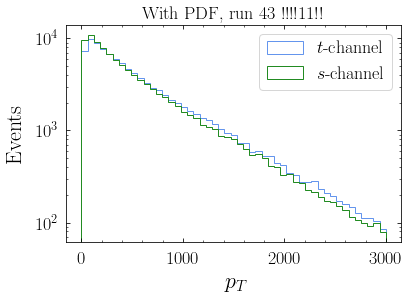

In [10]:
plt.hist(eta_Ary_1, bins = np.linspace(0,3000,50),histtype='step', label='$t$-channel');
plt.hist(eta_Ary_zp_1, bins = np.linspace(0,3000,50),histtype='step', label='$s$-channel');
plt.legend(loc='upper right')
plt.ylabel("Events")
plt.xlabel("$p_T$")
plt.title("$\hat s <$ 500")
plt.yscale("log")
plt.title("With PDF, run 43 !!!!11!!")

In [15]:
100*4.784e-17/2.9287475e-16

16.33462768640861

## Plot parton-level $\eta$ distributions for $t$-channel 

In [55]:
nevts = 10000
eta_Ary_1 = np.zeros((nevts))
eta_Ary_2 = np.zeros((nevts))
eta_Ary_3 = np.zeros((nevts))
eta_Ary_4 = np.zeros((nevts))



for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_100000_0/bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_1[ie] = np.abs(deta(e.particles[2], e.particles[3]))

for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_500.0_0//bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_2[ie] = np.abs(deta(e.particles[2], e.particles[3]))
    
for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_1263.15789474_0///bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_3[ie] = np.abs(deta(e.particles[2], e.particles[3]))

for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_4315.78947368_0///bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_4[ie] = np.abs(deta(e.particles[2], e.particles[3]))

In [81]:
nevts = 10000
eta_Ary_1 = np.zeros((nevts))
eta_Ary_2 = np.zeros((nevts))
eta_Ary_3 = np.zeros((nevts))
eta_Ary_4 = np.zeros((nevts))



for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_100000_0/bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_1[ie] = np.abs(pT(e.particles[3]))

for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_500.0_0//bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_2[ie] = np.abs(pT(e.particles[3]))
    
for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_1263.15789474_0///bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_3[ie] = np.abs(pT(e.particles[3]))

for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_4315.78947368_0///bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
    if ie > nevts-1: break
    eta_Ary_4[ie] = np.abs(pT(e.particles[3]))

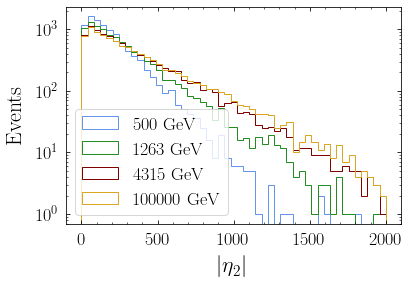

In [82]:
plt.hist(eta_Ary_2, bins = np.linspace(0,2000,50),histtype='step', label='500 GeV');
plt.hist(eta_Ary_3, bins = np.linspace(0,2000,50),histtype='step', label='1263 GeV');
plt.hist(eta_Ary_4, bins = np.linspace(0,2000,50),histtype='step', label='4315 GeV');
plt.hist(eta_Ary_1, bins = np.linspace(0,2000,50),histtype='step', label='100000 GeV');


plt.legend(loc='lower left')
plt.ylabel("Events")
plt.xlabel("$|\eta_{2}|$")
# plt.xlabel("$|\Delta\eta_{12}|$")


# plt.title("$\hat s <$ 500")
plt.yscale("log")
# plt.title("")

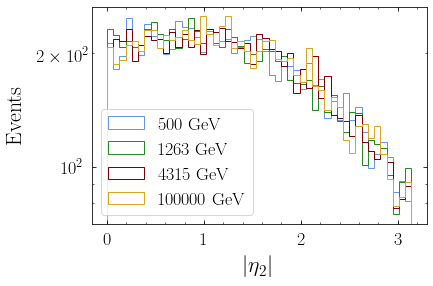

In [62]:
plt.hist(eta_Ary_2, bins = np.linspace(0,np.pi,50),histtype='step', label='500 GeV');
plt.hist(eta_Ary_3, bins = np.linspace(0,np.pi,50),histtype='step', label='1263 GeV');
plt.hist(eta_Ary_4, bins = np.linspace(0,np.pi,50),histtype='step', label='4315 GeV');
plt.hist(eta_Ary_1, bins = np.linspace(0,np.pi,50),histtype='step', label='100000 GeV');


plt.legend(loc='lower left')
plt.ylabel("Events")
plt.xlabel("$|\eta_{2}|$")
# plt.xlabel("$|\Delta\eta_{12}|$")


# plt.title("$\hat s <$ 500")
plt.yscale("log")
# plt.title("")

In [20]:
eta_Ary_1

array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

In [129]:
# for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_100000_0/bin/sig_tchannel/Events/run_01/unweighted_events.lhe"))):
for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel///Events/events_10000_0.lhe"))):
    if ie > nevts-1: break
    print[e.particles[i].id for i in range(len(e.particles))]

[-2.0, 2.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0, 21.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[-1.0, 1.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[2.0, -2.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[2.0, -2.0, 4900101.0, -4900101.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[-1.0, 1.0, 4900101.0, -4900101.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[1.0, -1.0, 4900101.0, -4900101.0, 21.0]
[21.0, 2.0, 4900101.0, -4900101.0, 2.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[2.0, -2.0, 4900101.0, -4900101.0]
[2.0, -2.0, 4900101.0, -4900101.0, 21.0]
[2.0, -2.0, 4900101.0, -4900101.0, 21.0]
[2.0, 21.0, 4900101.0, -4900101.0, 2.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[-1.0, 1.0, 4900101.0, -4900101.0, 21.0]
[1.0, -1.0, 4900101.0, -4900101.0]
[-2.0, 2.0, 4900101.0, -4900101.0]
[21.0, 2.0, 4900101.0, -4900101.0, 2.0]
[-3.0, 3.0

## Different channels

In [142]:
nevts = 50000
eta_Ary_1 = np.zeros((nevts))
eta_Ary_2 = np.zeros((nevts))
eta_Ary_3 = np.zeros((nevts))


for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../tchannel_events_backup/events_500_0.lhe"))):
    if ie > nevts-1: break
    eta_Ary_1[ie] = np.abs(ecm(e.particles[2],e.particles[3]))

for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../tchannel_events_backup/events_100000_0.lhe"))):
    if ie > nevts-1: break
    eta_Ary_2[ie] = np.abs(ecm(e.particles[2],e.particles[3]))
    
# for ie, e in enumerate(tqdm_notebook(pylhe.readLHE("../MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_phiphi///Events/events_100000_0.lhe"))):
#     if ie > nevts-1: break
#     eta_Ary_3[ie] = np.abs(eta(e.particles[4]))


In [145]:
# Plot font sizes

fs_labels = 26
fs_ticks = 25
fs_text = 23
fs_legend = 22

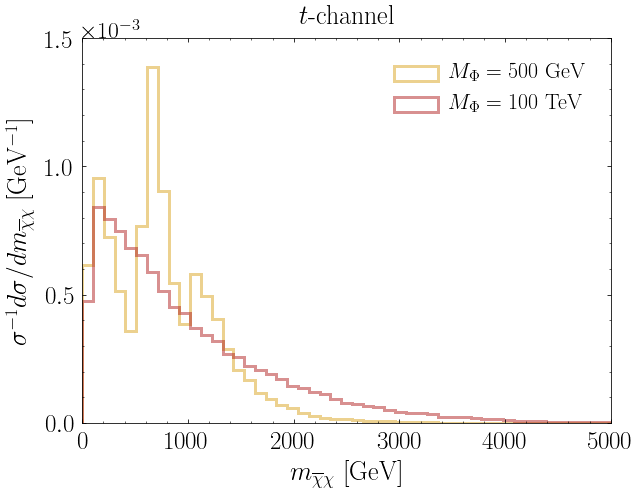

In [191]:
fig=plt.figure(figsize=(9,7))
bins = np.linspace(0,5000,50)
bw = bins[1] - bins[0]
plt.hist(eta_Ary_1, weights=len(eta_Ary_1)*[1/float(len(eta_Ary_1))/bw],histtype='step', bins = bins, label='$M_\Phi = 500$ GeV',lw=3, alpha=0.5, color='goldenrod');
plt.hist(eta_Ary_2,weights=len(eta_Ary_2)*[1/float(len(eta_Ary_2))/bw],histtype='step',  bins = bins, label='$M_\Phi = 100$ TeV',lw=3, alpha=0.5, color='firebrick');
# plt.hist(eta_Ary_3, bins = np.linspace(0,np.pi,50),histtype='step', label='100000 GeV');

plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

plt.legend(loc='lower right')
plt.ylabel(r'${\sigma^{-1}d\sigma/d m_{\overline\chi\chi}}$ [GeV$^{-1}$]', fontsize=fs_labels)
plt.xlabel("$m_{\overline\chi\chi}$ [GeV]", fontsize=fs_labels)
# plt.xlabel("$|\Delta\eta_{12}|$")

leg = plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=fs_legend, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)

title='$t$-channel'

plt.title(title, fontsize=fs_labels)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(fs_labels/1.1)
plt.yticks(np.array([0, 0.5, 1,1.5])*1e-3)
plt.ylim(0,1.5e-3)
plt.xlim(0, 5000)
plt.tight_layout()
plt.savefig("tchannel_mchi_contact.pdf")
# plt.yscale("log")
# plt.title("$\hat s <$ 500")
# plt.yscale("log")
# plt.title("")